# Distance moyenne aux commerces - Sources de données points de distribution alimentaire



In [1]:
# Configuration globale
import pandas
# Pour recharger automatiquement le code externe au notebook
from distance_moyenne_aux_commerces.points_distribution.calculer_base_consolidee_points_distribution import *
%load_ext autoreload
%autoreload 2

from IPython.display import display
#
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 2)



## Données BPE brutes

#### Chargement BPE

In [2]:
bpe_full = charger_donnees_bpe()
bpe_full

----CHARGER DONNEES BPE----


AAV2020    AN BV2012      DCIRIS  DEP DEPCOM         EPCI LABEL  \
0           524  2020  01093       01001   01  01001  200069193.0     X   
...         ...   ...    ...         ...  ...    ...          ...   ...   
2706352     9F1  2020    NaN  97617_XXXX  976  97617  200059871.0     X   

         LAMBERT_X   LAMBERT_Y       QUALITE_XY REG TYPEQU UU2020  
0        848167.97  6563141.11            Bonne  84   A404    NaN  
...            ...         ...              ...  ..    ...    ...  
2706352        NaN         NaN  Non géolocalisé  06   A403  9F304  

[2706353 rows x 14 columns]

In [3]:
bpe_metro = bpe_full[bpe_full.DEP.str.len() < 3]
bpe_metro

AAV2020    AN BV2012 DCIRIS DEP DEPCOM         EPCI LABEL  LAMBERT_X  \
0           524  2020  01093  01001  01  01001  200069193.0     X  848167.97   
...         ...   ...    ...    ...  ..    ...          ...   ...        ...   
2610237     001  2020  95355  95690  95  95690  249500513.0     X  612949.85   

          LAMBERT_Y QUALITE_XY REG TYPEQU UU2020  
0        6563141.11      Bonne  84   A404    NaN  
...             ...        ...  ..    ...    ...  
2610237  6888104.22      Bonne  11   A401    NaN  

[2610238 rows x 14 columns]

#### Extract commerces alimentaires

In [4]:
bpe_alim_geolocalise = (bpe_metro
                  .loc[bpe_metro.TYPEQU.isin(types_commerces_alimentaires_bpe.keys()), :]
                  .loc[bpe_metro.QUALITE_XY != 'Non géolocalisé', :]
                  )

display(bpe_alim_geolocalise)
part_equipements_alimentaires = bpe_alim_geolocalise.shape[0] / bpe_metro.shape[0] * 100
print(f'Part de commerces alimentaires dans BPE : {part_equipements_alimentaires:.2f}% ({bpe_alim_geolocalise.shape[0]} sur {bpe_metro.shape[0]})')


AAV2020    AN BV2012 DCIRIS DEP DEPCOM         EPCI LABEL  LAMBERT_X  \
1           524  2020  01093  01001  01  01001  200069193.0     X  847950.00   
...         ...   ...    ...    ...  ..    ...          ...   ...        ...   
2610234     001  2020  95355  95690  95  95690  249500513.0     X  612950.01   

          LAMBERT_Y QUALITE_XY REG TYPEQU UU2020  
1        6566550.00   Mauvaise  84   B202    NaN  
...             ...        ...  ..    ...    ...  
2610234  6888233.67      Bonne  11   B204    NaN  

[122772 rows x 14 columns]

Part de commerces alimentaires dans BPE : 4.70% (122772 sur 2610238)


#### Qualité de géolocalisation des commerces alimentaires

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(bpe_alim_geolocalise.QUALITE_XY.value_counts())



Bonne         112740
Mauvaise        7396
Acceptable      2636
Name: QUALITE_XY, dtype: int64

#### Suppression des doublons dans BPE
(environ 8000 doublons)

In [13]:
bpe_alim_sans_doublons = bpe_alim_geolocalise.drop_duplicates(ignore_index=True)


## Données BPE normalisées

In [14]:
bpe = normaliser_donnees_bpe(bpe_metro.drop_duplicates())
bpe

----NORMALISER DONNEES BPE----


id_region id_departement id_commune               nom_commerce  \
1              84             01      01001               Épicerie BPE   
...           ...            ...        ...                        ...   
2610234        11             95      95690  Boucherie charcuterie BPE   

        code_type_commerce  libelle_type_commerce qualite_geolocalisation  \
1                     SUPE               Épicerie                Mauvaise   
...                    ...                    ...                     ...   
2610234               BOUC  Boucherie charcuterie                   Bonne   

         longitude   latitude  
1         4.918226  46.182610  
...            ...        ...  
2610234   1.808270  49.088029  

[114903 rows x 9 columns]

#### Types de commerces

code_type_commerce     nb
0               BOUL  44445
2               BOUC  20578
1               SUPE  31887
3               SUPM  13550
4               POIS   2857
5               SURG   1586

<AxesSubplot:xlabel='code_type_commerce'>

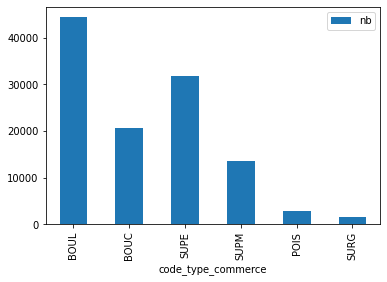

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    bpe_counts = bpe.code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    bpe_counts = bpe_counts.reindex([0, 2, 1, 3, 4, 5])
    display(bpe_counts)

bpe_counts.plot.bar(x='code_type_commerce')


#### Visualisation des commerces

Voir problématique des doublons : le long de la Seine, quai Jules Guesde

In [6]:
from distance_moyenne_aux_commerces.generation_cartes_et_stats_commerces import generer_carte_folium
bpe_vitry = bpe.loc[bpe['id_commune'] == '94081'].copy().drop_duplicates()
bpe_vitry['source'] = 'BPE'
bpe_vitry['id_commerce_osm'] = '--'
bpe_vitry['id_commerce_parent'] = '--'
bpe_vitry = ajouter_colonne_id_commerce(bpe_vitry)
f = generer_carte_folium(bpe_vitry)
f


NameError: name 'bpe' is not defined

## Données OSM brutes

#### Chargement OSM

In [16]:
osm_full = charger_donnees_osm()
osm_full.head(3)

----Chargement données OSM----


/tmp/ipykernel_14540/2447835337.py:3: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  osm_full = charger_donnees_osm()


Geo Point  \
0            43.70080090053997,3.8995679   
..                                   ...   
2   43.631618496396115,1.485144957073925   

                                                                                                                                                                                                                                                                   Geo Shape  \
0                                                                                                                                                                                                           {"coordinates": [3.8995679, 43.70080090053997], "type": "Point"}   
..                                                                                                                                                                                                                                                                       ...   
2   {"coordinates": [[[1.4850892, 43.63164580054089], [1.485109, 43.631600000540885], [1.4851989, 43.631562800540905], [1.4851547, 43.631678600540894], [1.4851437, 43.63167640054089], [1.4851507, 43.63165660054088], [1.4850892, 43.63164580054089]]], "type": "Polygon"}   

             osm_id      type                          name brand   operator  \
0   node/2372130003  pharmacy  Pharmacie Les Arômes d'Assas   NaN  J. Lesnik   
..              ...       ...                           ...   ...        ...   
2     way/827605903   jewelry                    Marc Orian   NaN        NaN   

   wheelchair      opening_hours level siret wikidata website phone email  \
0         NaN                NaN   NaN   NaN      NaN     NaN   NaN   NaN   
..        ...                ...   ...   ...      ...     ...   ...   ...   
2         NaN  Mo-Sa 10:00-20:00     0   NaN      NaN     NaN   NaN   NaN   

   facebook com_insee   com_nom  \
0       NaN     34014     Assas   
..      ...       ...       ...   
2       NaN     31555  Toulouse   

                                                                           url_caresteouvert  \
0   https://www.caresteouvert.fr/@43.700800900539974,43.700800900539974,17/place/n2372130003   
..                                                                                       ...   
2      https://www.caresteouvert.fr/@43.63161849641176,43.63161849641176,17/place/w827605903   

       region code_region    departement code_departement   commune  \
0   Occitanie          76        Hérault               34     Assas   
..        ...         ...            ...              ...       ...   
2   Occitanie          76  Haute-Garonne               31  Toulouse   

   code_commune  
0         34014  
..          ...  
2         31555  

[3 rows x 25 columns]

In [17]:
osm_metro = osm_full[osm_full.code_departement.str.len() < 3]
osm_metro

Geo Point  \
0                43.70080090053997,3.8995679   
...                                      ...   
529444  48.77169339429722,2.0704021155984904   

                                                                                                                                                                                                                                      Geo Shape  \
0                                                                                                                                                                              {"coordinates": [3.8995679, 43.70080090053997], "type": "Point"}   
...                                                                                                                                                                                                                                         ...   
529444  {"coordinates": [[[2.0703315, 48.77166919974894], [2.0703951, 48.77160199974896], [2.0704765, 48.77173779974891], [2.0704073, 48.77177249974893], [2.0703647, 48.771719799748915], [2.0703315, 48.77166919974894]]], "type": "Polygon"}   

                 osm_id      type                          name brand  \
0       node/2372130003  pharmacy  Pharmacie Les Arômes d'Assas   NaN   
...                 ...       ...                           ...   ...   
529444    way/116176581   butcher                           NaN   NaN   

         operator wheelchair opening_hours level siret wikidata website phone  \
0       J. Lesnik        NaN           NaN   NaN   NaN      NaN     NaN   NaN   
...           ...        ...           ...   ...   ...      ...     ...   ...   
529444        NaN        NaN           NaN   NaN   NaN      NaN     NaN   NaN   

       email facebook com_insee     com_nom  \
0        NaN      NaN     34014       Assas   
...      ...      ...       ...         ...   
529444   NaN      NaN     78297  Guyancourt   

                                                                               url_caresteouvert  \
0       https://www.caresteouvert.fr/@43.700800900539974,43.700800900539974,17/place/n2372130003   
...                                                                                          ...   
529444   https://www.caresteouvert.fr/@48.771693394348304,48.771693394348304,17/place/w116176581   

               region code_region departement code_departement     commune  \
0           Occitanie          76     Hérault               34       Assas   
...               ...         ...         ...              ...         ...   
529444  Île-de-France          11    Yvelines               78  Guyancourt   

       code_commune  
0             34014  
...             ...  
529444        78297  

[511543 rows x 25 columns]

#### Extract commerces alimentaires

In [18]:
osm_alim_geolocalise = (osm_metro
                  .loc[osm_metro.type.isin(types_commerces_alimentaires_osm.keys()), :]
                  )

display(osm_alim_geolocalise.head(3))
part_equipements_alimentaires_osm = osm_alim_geolocalise.shape[0] / osm_metro.shape[0] * 100
print(f'Part de commerces alimentaires dans OSM : {part_equipements_alimentaires_osm:.2f}% ({osm_alim_geolocalise.shape[0]} sur {osm_metro.shape[0]})')



Geo Point  \
1   43.06719680053808,0.1544316   
..                          ...   
23  45.86152665036342,4.5422632   

                                                                                                                                                                                                    Geo Shape  \
1                                                                                                                                            {"coordinates": [0.1544316, 43.06719680053808], "type": "Point"}   
..                                                                                                                                                                                                        ...   
23  {"coordinates": [[[4.5421485, 45.861540800363414], [4.5423135, 45.86145350036343], [4.5423779, 45.861512500363425], [4.5422129, 45.86159980036341], [4.5421485, 45.861540800363414]]], "type": "Polygon"}   

             osm_id         type                    name    brand operator  \
1   node/8821058217  supermarket                 Biocoop  Biocoop      NaN   
..              ...          ...                     ...      ...      ...   
23     way/28479483       bakery  Boulangerie de la Gare      NaN      NaN   

   wheelchair                                                opening_hours  \
1         NaN  Mo-Fr 09:30-13:00, 15:00-19:00; Sa 09:30-13:00, 16:00-19:00   
..        ...                                                          ...   
23        NaN                                                          NaN   

   level           siret  wikidata                            website  \
1    NaN  84106744000013  Q2904039    https://www.biocoopbricavrac.fr   
..   ...             ...       ...                                ...   
23   NaN             NaN       NaN  https://laboulangeriedelagare.fr/   

                phone email facebook com_insee                com_nom  \
1   +33 5 62 95 03 43   NaN      NaN     65059    Bagnères-de-Bigorre   
..                ...   ...      ...       ...                    ...   
23       +33474051403   NaN      NaN     69234  Saint-Romain-de-Popey   

                                                                           url_caresteouvert  \
1   https://www.caresteouvert.fr/@43.067196800538085,43.067196800538085,17/place/n8821058217   
..                                                                                       ...   
23      https://www.caresteouvert.fr/@45.86152665039755,45.86152665039755,17/place/w28479483   

                  region code_region      departement code_departement  \
1              Occitanie          76  Hautes-Pyrénées               65   
..                   ...         ...              ...              ...   
23  Auvergne-Rhône-Alpes          84            Rhône               69   

                  commune code_commune  
1     Bagnères-de-Bigorre        65059  
..                    ...          ...  
23  Saint-Romain-de-Popey        69234  

[3 rows x 25 columns]

Part de commerces alimentaires dans OSM : 15.13% (77403 sur 511543)


## Données OSM normalisées

In [19]:
osm = normaliser_donnees_osm(osm_metro)
osm

----Normaliser données OSM----


/home/lionel/lga/crater-app/crater-data-exploration/distance_moyenne_aux_commerces/creation_base_commerces_consolidee.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_osm['longitude'] = df_osm_ll.iloc[:, 1]
/home/lionel/lga/crater-app/crater-data-exploration/distance_moyenne_aux_commerces/creation_base_commerces_consolidee.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_osm['latitude'] = df_osm_ll.iloc[:, 0]


id_region id_departement id_commune nom_commerce code_type_commerce  \
1             76             65      65059      Biocoop               SUPM   
...          ...            ...        ...          ...                ...   
529444        11             78      78297          NaN               BOUC   

        libelle_type_commerce           longitude           latitude  
1                 Supermarché           0.1544316  43.06719680053808  
...                       ...                 ...                ...  
529444  Boucherie charcuterie  2.0704021155984904  48.77169339429722  

[77403 rows x 8 columns]

#### Types de commerces

code_type_commerce     nb
0               BOUL  26122
3               BOUC   8113
2               SUPE  15668
1               SUPM  17378
5               POIS   1254
6               SURG    985
4              AUTRE   7883

<AxesSubplot:xlabel='code_type_commerce'>

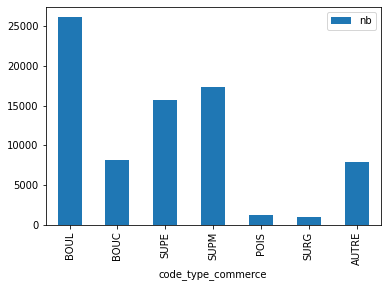

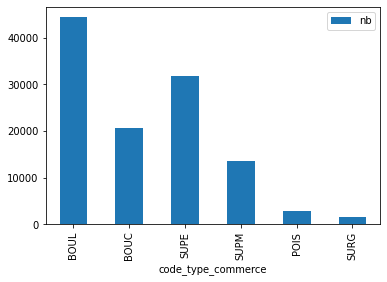

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    osm_counts = osm.code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    osm_counts = osm_counts.reindex([0, 3, 2, 1, 5, 6, 4])
    display(osm_counts)

osm_counts.plot.bar(x='code_type_commerce')

bpe_counts.plot.bar(x='code_type_commerce')

## Données SIRENE brutes

#### Chargement SIRENE

In [1]:
sirene_full = charger_donnees_sirene()
sirene_full.info(verbose=True)

----Chargement données SIRENE----


/tmp/ipykernel_29503/4001294296.py:3: DtypeWarning: Columns (0,1,2,3,7,10,11,13,17,19,22,24,25,26,27,28,31,33,34,35,36,37,38,39,44,49,50,51,58) have mixed types.Specify dtype option on import or set low_memory=False.
  sirene_full = charger_donnees_sirene()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289041 entries, 0 to 289040
Data columns (total 62 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   id                                    289041 non-null  object
 1   siren                                 289041 non-null  object
 2   nic                                   289041 non-null  object
 3   siret                                 289041 non-null  object
 4   statut_diffusion                      289041 non-null  object
 5   date_creation                         289041 non-null  object
 6   tranche_effectifs                     159406 non-null  object
 7   annee_effectifs                       118980 non-null  object
 8   activite_principale_registre_metiers  101085 non-null  object
 9   date_dernier_traitement               289041 non-null  object
 10  etablissement_siege                   289041 non-null  object
 11  nombre_period

In [2]:
sirene_metro = sirene_full[~sirene_full.code_commune.str[0:2].isin(['96', '97', '98', 'co'])]
sirene_metro.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272035 entries, 0 to 289040
Data columns (total 62 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   id                                    272035 non-null  object
 1   siren                                 272035 non-null  object
 2   nic                                   272035 non-null  object
 3   siret                                 272035 non-null  object
 4   statut_diffusion                      272035 non-null  object
 5   date_creation                         272035 non-null  object
 6   tranche_effectifs                     152893 non-null  object
 7   annee_effectifs                       115749 non-null  object
 8   activite_principale_registre_metiers  98181 non-null   object
 9   date_dernier_traitement               272035 non-null  object
 10  etablissement_siege                   272035 non-null  object
 11  nombre_period

#### Extract commerces alimentaires

In [3]:
sirene_alim_geolocalise = (sirene_metro
                  .loc[sirene_metro.activite_principale.isin(types_commerces_alimentaires_sirene.keys()), :]
                  )

display(sirene_alim_geolocalise.head(3))
part_equipements_alimentaires_sirene = sirene_alim_geolocalise.shape[0] / sirene_metro.shape[0] * 100
print(f'Part de commerces alimentaires dans SIRENE : {part_equipements_alimentaires_sirene:.2f}% ({sirene_alim_geolocalise.shape[0]} sur {sirene_metro.shape[0]})')



id      siren nic           siret statut_diffusion date_creation  \
0  1555711360  833513328  25  83351332800025                O    2021-08-26   
1  1555707941  904689734  13  90468973400013                O    2021-10-15   
2  1555696771  904601036  18  90460103600018                O    2021-10-12   

  tranche_effectifs annee_effectifs activite_principale_registre_metiers  \
0               NaN             NaN                                  NaN   
1               NaN             NaN                                  NaN   
2               NaN             NaN                                  NaN   

  date_dernier_traitement  ... geo_type geo_adresse geo_id geo_ligne geo_l4  \
0     2021-10-30T03:40:53  ...      NaN         NaN    NaN       NaN    NaN   
1     2021-10-30T08:56:18  ...      NaN         NaN    NaN       NaN    NaN   
2     2021-10-30T08:48:16  ...      NaN         NaN    NaN       NaN    NaN   

  geo_l5 unite_legale_id                     created_at  \
0    NaN       245208806  2021-10-31T05:02:38.497+01:00   
1    NaN       249707445  2021-10-30T07:28:18.221+02:00   
2    NaN       249698700  2021-10-29T08:01:04.082+02:00   

                      updated_at  \
0  2021-10-31T05:02:38.497+01:00   
1  2021-10-31T05:43:01.554+01:00   
2  2021-10-31T05:42:10.537+01:00   

                                        unite_legale  
0  {'id': 245208806, 'siren': '833513328', 'statu...  
1  {'id': 249707445, 'siren': '904689734', 'statu...  
2  {'id': 249698700, 'siren': '904601036', 'statu...  

[3 rows x 62 columns]

Part de commerces alimentaires dans SIRENE : 80.02% (217689 sur 272035)


## Données SIRENE normalisées

In [34]:
sirene = normaliser_donnees_sirene(sirene_metro)
sirene.info(verbose=True)


----Normaliser données SIRENE----


/home/lionel/lga/crater-app/crater-data-exploration/distance_moyenne_aux_commerces/creation_base_commerces_consolidee.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirene['id_departement'] = df_sirene['code_commune'].str[:2]
/home/lionel/lga/crater-app/crater-data-exploration/distance_moyenne_aux_commerces/creation_base_commerces_consolidee.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirene['id_region'] = ''


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261056 entries, 5 to 289037
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id_region                261056 non-null  object
 1   id_departement           261056 non-null  object
 2   id_commune               261056 non-null  object
 3   nom_commerce             30190 non-null   object
 4   code_type_commerce       209562 non-null  object
 5   libelle_type_commerce    209562 non-null  object
 6   longitude                261056 non-null  object
 7   latitude                 261056 non-null  object
 8   qualite_geolocalisation  261056 non-null  object
dtypes: object(9)
memory usage: 19.9+ MB


#### Types de commerces

code_type_commerce     nb
0               BOUL  98540
4               BOUC  19309
1               SUPE  38264
2               SUPM  24535
5               POIS   3084
6               SURG   1734
3              AUTRE  24096

<AxesSubplot:xlabel='code_type_commerce'>

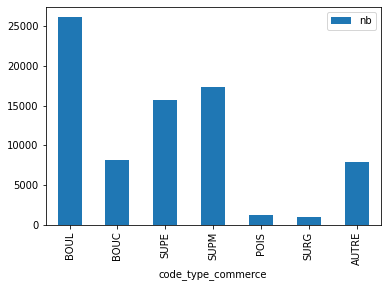

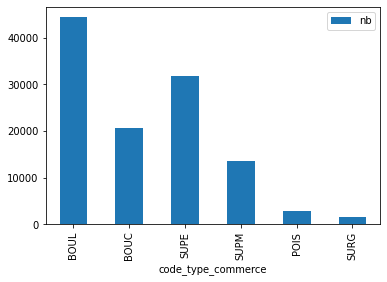

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    sirene_counts = sirene.code_type_commerce.value_counts().reset_index().rename(columns={'index':'code_type_commerce', 'code_type_commerce':'nb'})
    sirene_counts = sirene_counts.reindex([0, 4, 1, 2, 5, 6, 3])
    display(sirene_counts)

osm_counts.plot.bar(x='code_type_commerce')

bpe_counts.plot.bar(x='code_type_commerce')

sirene_counts.plot.bar(x='code_type_commerce')

